In [1]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, GenericUnivariateSelect,SelectPercentile, chi2,f_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Read in data
df =pd.read_csv('auto_imports1(1).csv')

df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         201 non-null    object 
 11  stroke       201 non-null    object 
 12  comprassion  201 non-null    float64
 13  horse_power  201 non-null    object 
 14  peak_rpm     201 non-null    object 
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(5), int64(5), object(8)
memory usage: 2

In [4]:
df=df.replace('?', None)

In [5]:
df["bore"] = df["bore"].astype(float)
df["stroke"] = df["stroke"].astype(float)
df["horse_power"] = df["horse_power"].astype(float)
df["peak_rpm"] = df["peak_rpm"].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         201 non-null    float64
 11  stroke       201 non-null    float64
 12  comprassion  201 non-null    float64
 13  horse_power  201 non-null    float64
 14  peak_rpm     201 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

In [7]:
df2=df.drop(columns=['body','engine_type','cylinders'])

In [8]:
df2.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [9]:
df2.dropna()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,gas,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,gas,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,gas,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,diesel,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470


## Checking null values.

In [10]:
df2.isnull().sum()

fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           0
stroke         0
comprassion    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dtype: int64

## Creating dummy variables.

In [11]:
df2=pd.get_dummies(df2,columns=["fuel_type"],drop_first=True)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     201 non-null    float64
 1   length         201 non-null    float64
 2   width          201 non-null    float64
 3   heights        201 non-null    float64
 4   curb_weight    201 non-null    int64  
 5   engine_size    201 non-null    int64  
 6   bore           201 non-null    float64
 7   stroke         201 non-null    float64
 8   comprassion    201 non-null    float64
 9   horse_power    201 non-null    float64
 10  peak_rpm       201 non-null    float64
 11  city_mpg       201 non-null    int64  
 12  highway_mpg    201 non-null    int64  
 13  price          201 non-null    int64  
 14  fuel_type_gas  201 non-null    uint8  
dtypes: float64(9), int64(5), uint8(1)
memory usage: 22.3 KB


In [13]:
df2.head()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,1
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,1
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,1
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,1


## Price is the target variable here.

In [14]:
X=df2.loc[:, df2.columns != 'price']
Y=df2['price']

## SelectKBest

In [15]:
selector = SelectKBest(score_func=f_regression, k =9)
selector.fit(X, Y)
print('selected features:')
X.columns[selector.get_support()]

selected features:


Index(['wheel_base', 'length', 'width', 'curb_weight', 'engine_size', 'bore',
       'horse_power', 'city_mpg', 'highway_mpg'],
      dtype='object')

## Using selectKBest method we got features wheel_base, length, width, curb_weight, engine_size, bore, horse_power, city_mpg, highway_mpg
 

## SelectPercentile

In [16]:
X_new = SelectPercentile(f_regression, percentile=20)
X_new.fit_transform(X, Y)
X.columns[X_new.get_support()]

Index(['curb_weight', 'engine_size', 'horse_power'], dtype='object')

## Correlation Matrix 

In [17]:
correlation_matrix = df2.corr()
correlation_matrix

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
wheel_base,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.499720,0.161682,0.250313,0.345997,-0.362731,-0.470606,-0.543304,0.584642,-0.307237
length,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.611615,0.126626,0.159733,0.569588,-0.275830,-0.665192,-0.698142,0.690628,-0.211187
width,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.541936,0.189210,0.189867,0.601264,-0.237576,-0.633531,-0.680635,0.751265,-0.244356
heights,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.210370,-0.049251,0.259737,-0.093819,-0.311934,-0.049800,-0.104812,0.135486,-0.281578
curb_weight,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.643767,0.169111,0.156433,0.728827,-0.276848,-0.749543,-0.794889,0.834415,-0.221046
engine_size,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.591943,0.214419,0.028889,0.796320,-0.251424,-0.650546,-0.679571,0.872335,-0.070779
bore,0.499720,0.611615,0.541936,0.210370,0.643767,0.591943,1.000000,-0.048718,0.004778,0.552154,-0.287392,-0.552856,-0.565467,0.538993,-0.060124
stroke,0.161682,0.126626,0.189210,-0.049251,0.169111,0.214419,-0.048718,1.000000,0.188933,0.147628,-0.042193,-0.025173,-0.027081,0.082334,-0.243003
comprassion,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,0.004778,0.188933,1.000000,-0.216481,-0.435962,0.331425,0.268465,0.071107,-0.985231
horse_power,0.345997,0.569588,0.601264,-0.093819,0.728827,0.796320,0.552154,0.147628,-0.216481,1.000000,0.145386,-0.801598,-0.774382,0.768373,0.171754


## Correlation Heatmap

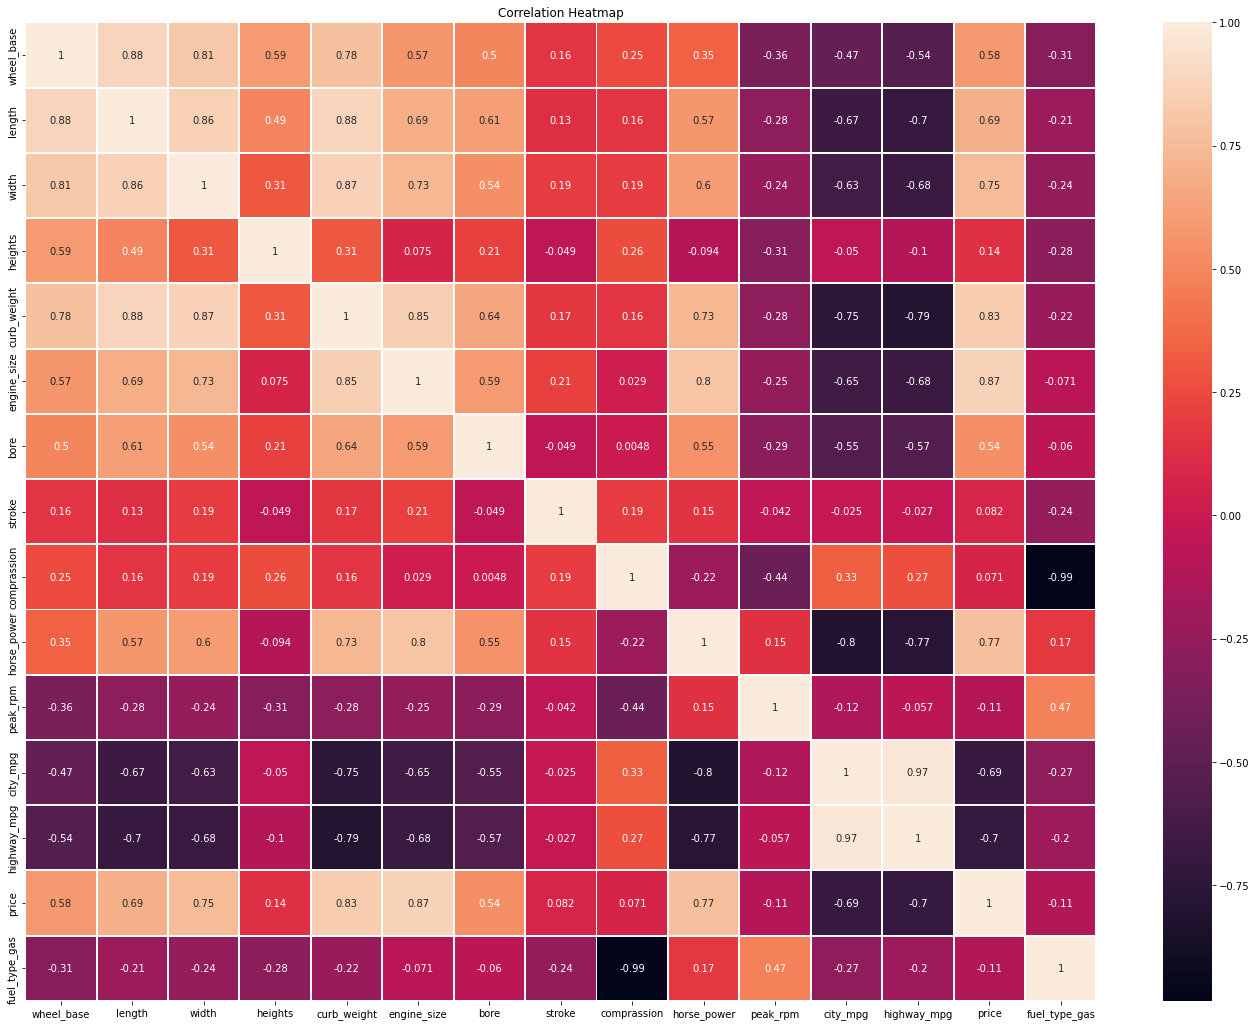

In [18]:
plt.figure(figsize=(24,18))
plt.title('Correlation Heatmap')
corr = df2.corr()
sns.heatmap(corr, annot=True, linewidths=1)
plt.show()

In [19]:
correlation = df2.corr()['wheel_base'].abs().sort_values(ascending = False)
correlation

wheel_base       1.000000
length           0.876024
width            0.814507
curb_weight      0.782097
heights          0.590742
price            0.584642
engine_size      0.572027
highway_mpg      0.543304
bore             0.499720
city_mpg         0.470606
peak_rpm         0.362731
horse_power      0.345997
fuel_type_gas    0.307237
comprassion      0.250313
stroke           0.161682
Name: wheel_base, dtype: float64

## recursive feature elimination

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9999)

X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)


forest = RandomForestRegressor()
_ = forest.fit(X_train_std, Y_train)
forest.score(X_test_std, Y_test)

0.8877382851265727

## By using recursive feature elimination we slipt the data test and train and using Random forest regressor and standard scaler we got a score 0.8847. Basically in recursive feature elimination we can use Random forest classifier and Random forest regressor as price is a target variable we use Random forest regressor. Random forest regression we selected the required features by eliminaring them.

In [21]:
pd.DataFrame(
    zip(X_train.columns, abs(forest.feature_importances_)),
    columns=["feature", "weight"],
).sort_values("weight").reset_index(drop=True)

,feature,weight
0,fuel_type_gas,0.000249
1,bore,0.004649
2,peak_rpm,0.005857
3,stroke,0.006325
4,wheel_base,0.007445
5,length,0.007837
6,comprassion,0.007996
7,heights,0.008071
8,city_mpg,0.008604
9,width,0.015198


In [22]:

from sklearn.feature_selection import RFE

# Init the transformer
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=9)

# Fit to the training data
_ = rfe.fit(X_train_std, Y_train)

In [23]:
X_train.loc[:, rfe.support_]

,wheel_base,length,width,heights,curb_weight,engine_size,horse_power,city_mpg,highway_mpg
0,88.6,168.8,64.1,48.8,2548,130,111.0,21,27
189,100.4,183.1,66.9,55.1,2563,109,88.0,25,31
128,99.1,186.6,66.5,56.1,2658,121,110.0,21,28
44,113.0,199.6,69.6,52.8,4066,258,176.0,15,19
157,95.7,166.3,64.4,52.8,2122,98,70.0,28,34
...,...,...,...,...,...,...,...,...,...
109,107.9,186.7,68.4,56.7,3252,152,95.0,28,33
47,93.1,159.1,64.2,54.1,1890,91,68.0,30,31
113,107.9,186.7,68.4,56.7,3252,152,95.0,28,33
126,96.1,181.5,66.5,55.2,2579,132,207.0,23,31


## After using recursive feature elimination the features have been reduced to wheel_base, length, width, heights,	curb_weight, engine_size, stroke, horse_power, highway_mpg.

In [24]:
forest = RandomForestRegressor()
_ = forest.fit(rfe.transform(X_train_std), Y_train)
forest.score(rfe.transform(X_test_std), Y_test)

0.8828549794510033

## ols model

In [25]:
x = sm.add_constant(X)
 
# performing the regression
# and fitting the model
result = sm.OLS(Y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     73.15
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           9.55e-68
Time:                        04:23:11   Log-Likelihood:                -1901.6
No. Observations:                 201   AIC:                             3833.
Df Residuals:                     186   BIC:                             3883.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.385e+04   1.87e+04     -1.814

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## OLS is used to compare models.

##  LASSO Regression

In [26]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, Y_train) 
pred_train_lasso= model_lasso.predict(X_train)
pred_test_lasso= model_lasso.predict(X_test)

In [27]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",model_lasso.coef_.transpose())
print(coef_table)

                0        Coefs
0      wheel_base   187.118647
1          length  -115.837093
2           width   297.000705
3         heights    76.100651
4     curb_weight     2.797365
5     engine_size   141.569517
6            bore -2630.067047
7          stroke -4765.149758
8     comprassion   447.908931
9     horse_power    28.884891
10       peak_rpm     2.244647
11       city_mpg  -479.102940
12    highway_mpg   382.699229
13  fuel_type_gas  1634.944194


## PCA is basically used for large data sets as the data set is small we were not able to get appropriate values. As we see below the R-Square value has been reduced because PCA is used for large dataset and the dataset we have is small.

In [28]:
# Standardizing the features
x = StandardScaler().fit_transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9'])

In [29]:
print(principalDf)

     principal component 1  principal component 2  principal component 3  \
0                71.220574            -103.015331              11.623516   
1                71.220574            -103.015331              11.623516   
2               290.084452              68.465044              32.143775   
3              -403.066074             161.092025              -2.374022   
4               -18.192148             460.367582             -18.023675   
..                     ...                    ...                    ...   
196             144.358243             459.855432             -26.478586   
197             283.512701             443.141383               0.171273   
198             132.514986             577.957133               2.460186   
199             721.317366             148.138268             -41.228618   
200             230.892887             527.063365             -36.179118   

     principal component 4  principal component 5  principal component 6  \
0          

In [30]:
finalDf = pd.concat([principalDf, df2[['price']]], axis = 1)

In [31]:
print(finalDf)

     principal component 1  principal component 2  principal component 3  \
0                71.220574            -103.015331              11.623516   
1                71.220574            -103.015331              11.623516   
2               290.084452              68.465044              32.143775   
3              -403.066074             161.092025              -2.374022   
4               -18.192148             460.367582             -18.023675   
..                     ...                    ...                    ...   
196             144.358243             459.855432             -26.478586   
197             283.512701             443.141383               0.171273   
198             132.514986             577.957133               2.460186   
199             721.317366             148.138268             -41.228618   
200             230.892887             527.063365             -36.179118   

     principal component 4  principal component 5  principal component 6  \
0          

In [32]:
X=finalDf.loc[:, finalDf.columns != 'price']
Y=finalDf['price']

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=999999)


In [34]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,Y_train)
y_pred=linreg.predict(X_test)

In [35]:
r_sq = linreg.score(X, Y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8186387780840811
